In [28]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'solve', 'i0', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
from photometry import *

In [30]:
from instabilities import *

In [31]:
from utils import *

In [32]:
dictionary = np.load('models//n1167_modelRmax.npy').tolist()

In [33]:
def plot_data_lim(ax, data_lim):
    '''Вертикальная линия, обозначающая конец данных'''
    ax.axvline(x=data_lim, ls='-.', color='black', alpha=0.5)
    
def plot_disc_scale(scale, ax, text=None):
    '''Обозначает масштаб диска'''
    ax.plot([scale, scale], [0., 0.05], '-', lw=6., color='black')
    if text:
        ax.annotate(text, xy=(scale, 0.025), xytext=(scale, 0.065), textcoords='data', arrowprops=dict(arrowstyle="->"))
        
def plot_Q_levels(ax, Qs, style='--', color='grey', alpha=0.4):
    '''Функция, чтобы рисовать горизонтальные линии различных уровней $Q^{-1}$:'''
    for Q in Qs:
        ax.axhline(y=1./Q, ls=style, color=color, alpha=alpha)
        
def plot_2f_vs_1f_(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, **kwargs):
    '''Картинка сравнения 2F и 1F критерия для разных фотометрий и величин sig_R, 
    куда подается весь газ, результат НЕ исправляется за осесимметричные возмущения.'''
    
    Qgs = []
    Qss = []
    invQeff_min = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_max[ind], star_density=star_density_min[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_max[ind], np.arange(0.01, 60000., 1.))
        invQeff_min.append(qeff[1])


    Qgs = []
    Qss = []
    invQeff_max = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_min[ind], star_density=star_density_max[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_min[ind], np.arange(0.01, 60000., 1.))
        invQeff_max.append(qeff[1])
           
    rr = zip(*total_gas_data)[0]
    
    ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=label)
    ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6)
    ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6)
    ax.plot(rr, [1./_ for _ in Qgs], 'v-', color='b')

    ax.set_ylim(0., 1.5)
    ax.set_xlim(0., data_lim+50.)
    plot_data_lim(ax, data_lim)
    for h, annot in disk_scales:
        plot_disc_scale(h, ax, annot)
    plot_Q_levels(ax, [1., 1.5, 2., 3.])
    ax.legend()

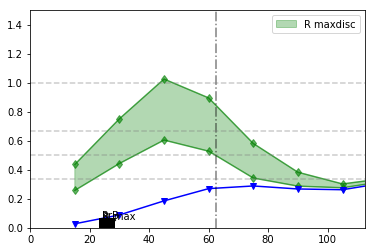

In [34]:
plot_2f_vs_1f_(ax=plt.gca(), **dictionary);

In [35]:
dictionary = np.load('models//n1167_modelRsubmax.npy').tolist()

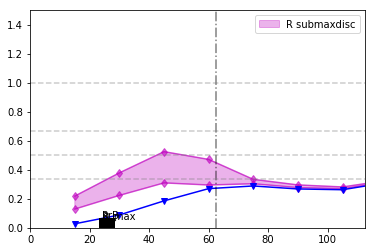

In [36]:
plot_2f_vs_1f_(ax=plt.gca(), **dictionary);

In [37]:
models = {}
for model in os.listdir('models/'):
    models[model[:-4]] = np.load('models//'+model).tolist()

In [38]:
models.keys()

['n5533_modelRzeroH2',
 'n4725_model36max',
 'n5533_modelr',
 'n1167_modelRsubmax',
 'n338_modelB',
 'n3898_modelRmax',
 'n4725_modelHmax',
 'n3898_modelR2dmax',
 'n2985_modelKmax',
 'n1167_modelRmax',
 'n5533_modelRmax',
 'n2985_model36max',
 'n338_modelR',
 'n4258_model36max',
 'n4258_modelImax']

In [39]:
for ind, model in enumerate(models.keys()):
    models[model]['color'] = cm.rainbow(np.linspace(0, 1, 15))[ind]

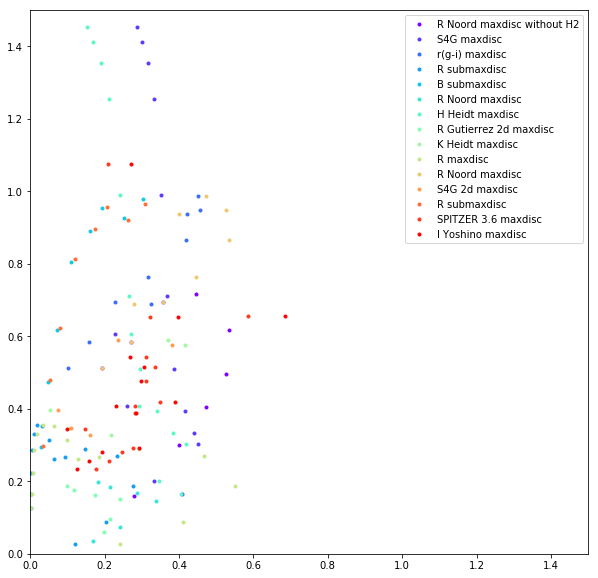

In [40]:
def plot_Qg_vs_Qs_squared(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, **kwargs):
    
    Qgs = []
    Qss = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_max[ind], star_density=star_density_min[ind]))


#     Qgs = []
#     Qss = []
#     invQeff_max = []
#     for ind, (r, gd) in enumerate(total_gas_data):
#         Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
#         Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_min[ind], star_density=star_density_max[ind]))
#         qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_min[ind], np.arange(0.01, 60000., 1.))
#         invQeff_max.append(qeff[1])
           
    rr = zip(*total_gas_data)[0]
    
#     ax.fill_between(rr, invQeff_min, invQeff_max, color=color, alpha=alpha, label=label)
#     ax.plot(rr, invQeff_min, 'd-', color=color, alpha=0.6)
#     ax.plot(rr, invQeff_max, 'd-', color=color, alpha=0.6)
    ax.plot([1./_ for _ in Qss], [1./_ for _ in Qgs], '.', color=color, label=label)

#     ax.set_ylim(0., 1.5)
#     ax.set_xlim(0., data_lim+50.)
#     plot_data_lim(ax, data_lim)
#     for h, annot in disk_scales:
#         plot_disc_scale(h, ax, annot)
#     plot_Q_levels(ax, [1., 1.5, 2., 3.])
#     ax.legend()


fig = plt.figure(figsize = [10,10])
ax = plt.gca()
for key, model in models.items():
    plot_Qg_vs_Qs_squared(ax, **model)
    
plt.legend()
plt.xlim(0, 1.5)
plt.ylim(0, 1.5);

plot n338_modelB
plot n338_modelR
plot n1167_modelRsubmax
plot n1167_modelRmax
plot n2985_modelKmax
plot n2985_model36max
plot n3898_modelRmax
plot n3898_modelR2dmax
plot n4258_model36max
plot n4258_modelImax
plot n4725_model36max
plot n4725_modelHmax
plot n5533_modelRzeroH2
plot n5533_modelr
plot n5533_modelRmax


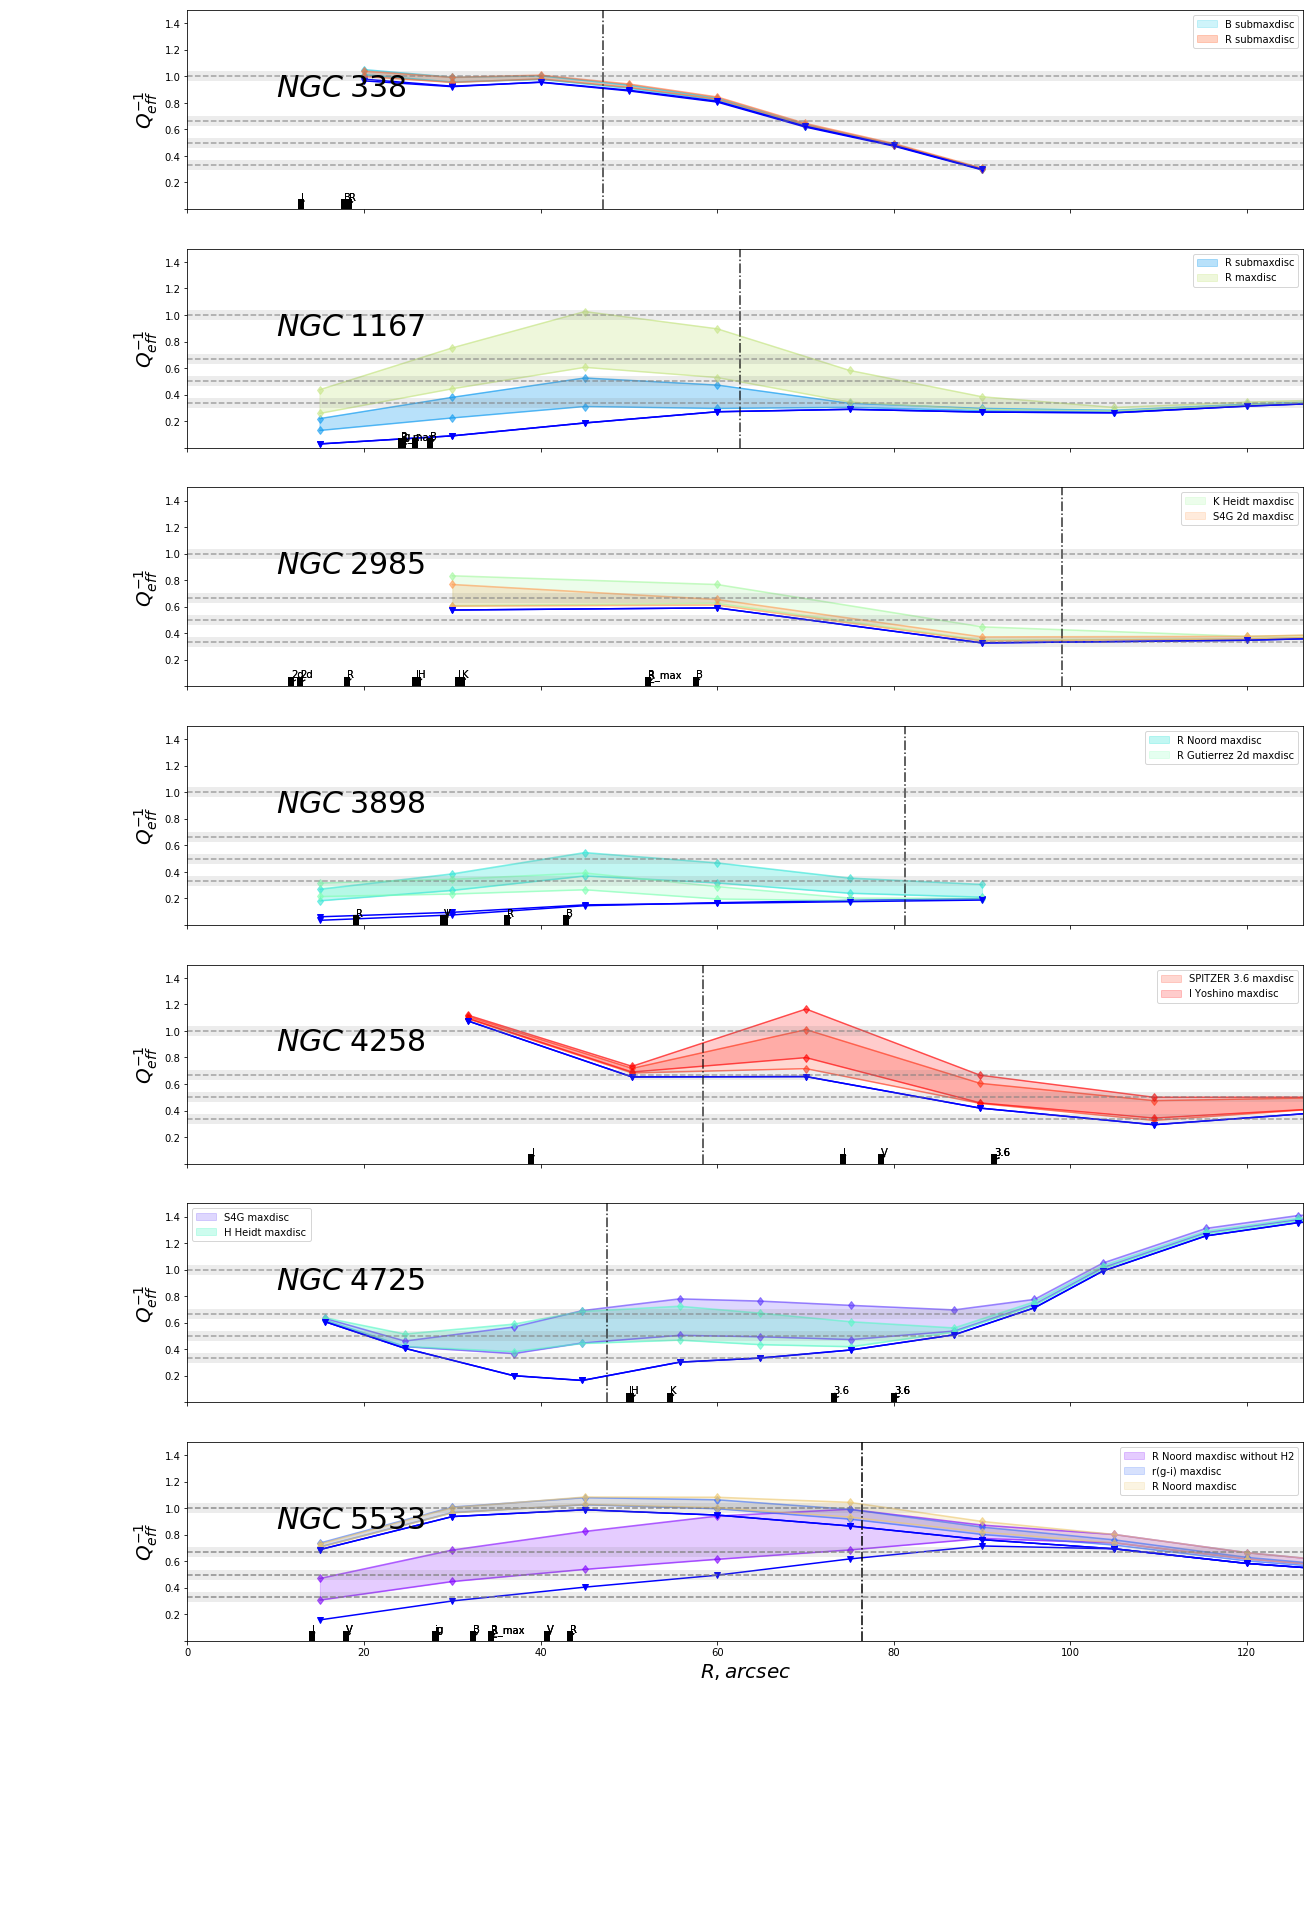

Wall time: 3min 52s


In [43]:
%%time
fi, axes = plt.subplots(ncols=1, nrows=7, figsize=[20., 30.], sharex=True)

for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    ax = axes[ind]
    for key in models.keys():
        if name in key:
            print 'plot {}'.format(key)
            plot_2f_vs_1f_(ax, **models[key])
    ax.text(10, 0.85, r'$NGC\: {}$'.format(name[1:]), fontsize=30)

    if ind == 6:
        ax.set_xlabel(r'$R, arcsec$', fontsize=20)
    ax.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=20)
    for q_ in [1., 1.5, 2., 3.]:
        ax.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
#     ax.set_yticks(['', '0.2', '0.4', '0.6', '0.8', '1.0', ''])
    plt.setp(ax.get_yticklabels()[0], visible=False)    
    plt.setp(ax.get_yticklabels()[-1], visible=False)
    
plt.show();

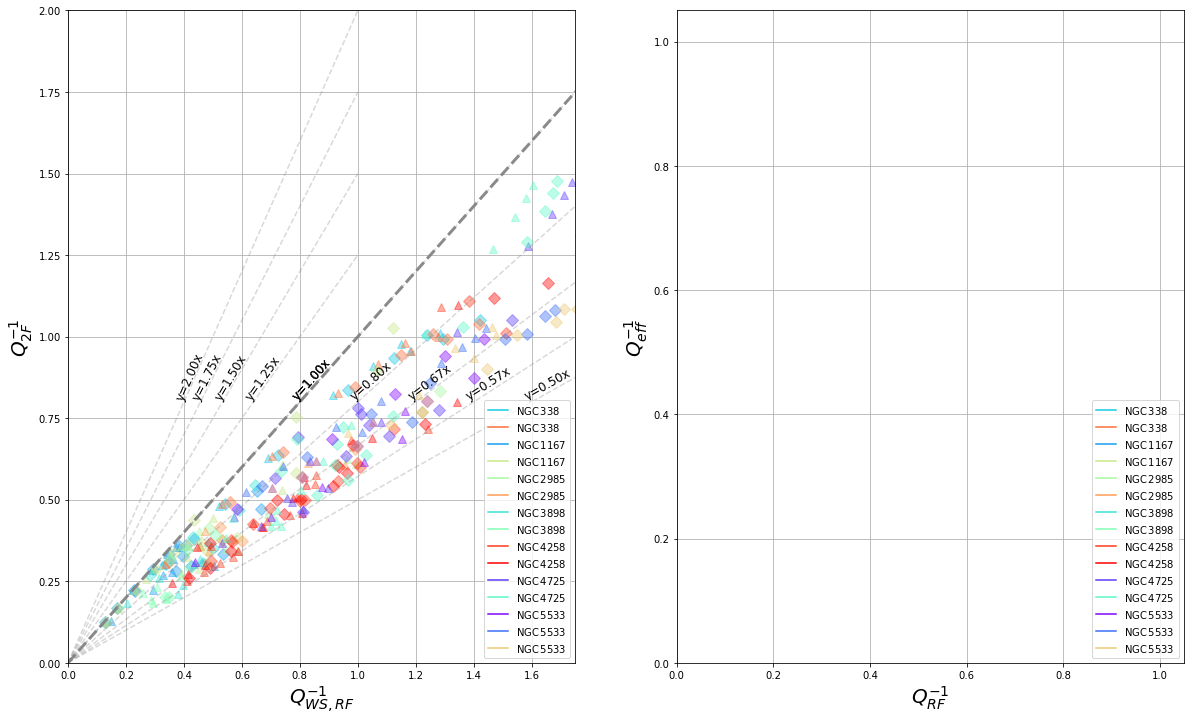

Wall time: 3min 52s


In [51]:
%%time

import scipy.interpolate
def plot_WS_vs_2f(ax=None, total_gas_data=None, epicycl=None, gas_approx=None, sound_vel=None, scale=None, sigma_max=None, sigma_min=None, star_density_max=None, 
                  star_density_min=None, data_lim=None, color=None, alpha=0.3, disk_scales=[], label=None, sfrange=None, **kwargs):
    
    rr = zip(*total_gas_data)[0]

    Qgs = []
    Qss = []
    invQeff_min = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_max[ind], star_density=star_density_min[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_max[ind], np.arange(0.01, 60000., 1.))
        invQeff_min.append(qeff[1])
        
    invQwff_WS_min = [1./Qg_ + 1./Qs_ for Qg_, Qs_ in zip(Qgs, Qss)]

    Qgs = []
    Qss = []
    invQeff_max = []
    for ind, (r, gd) in enumerate(total_gas_data):
        Qgs.append(Qg(epicycl=epicycl[ind], sound_vel=sound_vel, gas_density=gd))
        Qss.append(Qs(epicycl=epicycl[ind], sigma=sigma_min[ind], star_density=star_density_max[ind]))
        qeff = findInvKinemQeffBrentq(Qss[-1], Qgs[-1], sound_vel/sigma_min[ind], np.arange(0.01, 60000., 1.))
        invQeff_max.append(qeff[1])
        
    invQwff_WS_max = [1./Qg_ + 1./Qs_ for Qg_, Qs_ in zip(Qgs, Qss)]
    
    ax.plot(invQwff_WS_min, invQeff_min, '^', color=color, alpha=0.4, ms=8, lw=1)
    ax.plot(invQwff_WS_max, invQeff_max, 'D', color=color, alpha=0.4, ms=8, lw=1)
    
    return invQwff_WS_min, invQwff_WS_max
    
    
def plot_RF13_vs_2F(ax=None, r_g_dens=None, HI_gas_dens=None, CO_gas_dens=None, epicycl=None, sound_vel=None, sigma_R_max=None, sigma_R_min=None,  
           star_density=None, alpha_max=None, alpha_min=None, scale=None, gas_approx=None, thin=True, show=False, color=None, **kwargs):
    '''Плотности газа передаются не скорр. за гелий.'''
    
    if thin:
        romeo_Q = romeo_Qinv_thin
    else:
        romeo_Q = romeo_Qinv
            
    totgas = zip(r_g_dens, [He_coeff*(l[0]+l[1]) for l in zip(HI_gas_dens, CO_gas_dens)])
    
    if show:
        print 'sig_R_max case:'
    romeo_min = []
    for r, g, co in zip(r_g_dens, HI_gas_dens, CO_gas_dens):
        rom, _ = romeo_Q(r=r, epicycl=epicycl, sound_vel=sound_vel, sigma_R=sigma_R_max, 
               star_density=star_density, HI_density=He_coeff*g, CO_density=He_coeff*co, 
                         alpha=alpha_min, scale=scale, gas_approx=gas_approx)
        romeo_min.append(rom)



    invQg, invQs, invQeff_min = zip(*get_invQeff_from_data(gas_data=totgas, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_R_max,
                                    star_density=star_density))

    if show:
        print 'sig_R_min case:'
    
    romeo_max = []
    for r, g, co in zip(r_g_dens, HI_gas_dens, CO_gas_dens):
        rom, _ = romeo_Q(r=r, epicycl=epicycl, sound_vel=sound_vel, sigma_R=sigma_R_min, 
               star_density=star_density, HI_density=He_coeff*g, CO_density=He_coeff*co, 
                         alpha=alpha_max, scale=scale, gas_approx=gas_approx)
        romeo_max.append(rom)



    invQg, invQs, invQeff_max = zip(*get_invQeff_from_data(gas_data=totgas, 
                                    epicycl=epicycl, 
                                    gas_approx=gas_approx,
                                    sound_vel=sound_vel, 
                                    scale=scale,
                                    sigma=sigma_R_min,
                                    star_density=star_density))

    
    ax.plot(romeo_min, invQeff_min, 's', color=color, alpha=0.4, ms=8)
    ax.plot(romeo_max, invQeff_max, 'o', color=color, alpha=0.4, ms=8)
    
    return invQeff_min, invQeff_max, romeo_min, romeo_max
    

fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=[20, 12])


for ind, name in enumerate(['n338', 'n1167', 'n2985', 'n3898', 'n4258', 'n4725', 'n5533']):
    for key in models.keys():
        if name in key:
            color = models[key]['color']
            
            invQwff_WS_min, invQwff_WS_max = plot_WS_vs_2f(ax=ax, **models[key])
            ax.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}$')
                
#             invQeff_min, invQeff_max, romeo_min, romeo_max = plot_RF13_vs_2F(ax=ax2, r_g_dens=zip(*total_gas_data)[0], 
#                             HI_gas_dens=zip(*total_gas_data)[1], 
#                             CO_gas_dens=zip(*total_gas_data)[2], 
#                             epicycl=epicycl, 
#                             sound_vel=6., 
#                             sigma_R_max=locals()[name+'dict']['sig_R_maj_max'], 
#                             sigma_R_min=locals()[name+'dict']['sig_R_maj_min'],  
#                             star_density=star_density, 
#                             alpha_max=0.7, 
#                             alpha_min=0.3, 
#                             scale=locals()[name+'dict']['scale'], 
#                             gas_approx=locals()[name+'dict']['spl_gas'], 
#                             thin=True,
#                             color=color)
            ax2.plot([-1, -2], [-1, -2], '-', color=color, label=r'$\rm{NGC\, '+name[1:]+'}$')
            
def label_line(line, label, x, y, color='0.5', size=12):
    """Add a label to a line, at the proper angle.

    Arguments
    ---------
    line : matplotlib.lines.Line2D object,
    label : str
    x : float
        x-position to place center of text (in data coordinated
    y : float
        y-position to place center of text (in data coordinates)
    color : str
    size : float
    """
    xdata, ydata = line.get_data()
    x1 = xdata[0]
    x2 = xdata[-1]
    y1 = ydata[0]
    y2 = ydata[-1]

    ax = line.get_axes()
    text = ax.annotate(label, xy=(x, y), xytext=(-10, 0),
                       textcoords='offset points',
                       size=size, color=color,
                       horizontalalignment='left',
                       verticalalignment='bottom')

    sp1 = ax.transData.transform_point((x1, y1))
    sp2 = ax.transData.transform_point((x2, y2))

    rise = (sp2[1] - sp1[1])
    run = (sp2[0] - sp1[0])

    slope_degrees = np.degrees(np.arctan2(rise, run))
    text.set_rotation(slope_degrees)
    return text

ax.legend(loc='lower right')
ax.set_xlim(0, 1.75)
ax.set_ylim(0, 2.0)
ax.set_ylabel(r'$Q_{2F}^{-1}$', fontsize=20)
ax.set_xlabel(r'$Q_{WS,RF}^{-1}$', fontsize=20)
ax.grid()

ax2.legend(loc='lower right')
ax2.set_xlim(0, 1.05)
ax2.set_ylim(0, 1.05)
ax2.set_ylabel(r'$Q_{eff}^{-1}$', fontsize=20)
ax2.set_xlabel(r'$Q_{RF}^{-1}$', fontsize=20)
ax2.grid()

for _ in np.linspace(1., 2., 5):
       
    line, = ax.plot([0., _*2], [0., 2.0], '--', alpha=0.3, color='gray')
    label_line(line, 'y={:2.2f}x'.format(1./_), 0.8*_, 0.8, color='black')
    
    line2, = ax.plot([0., 1.0], [0., _], '--', alpha=0.3, color='gray')
    label_line(line2, 'y={:2.2f}x'.format(_), 0.8/_, 0.8, color='black')
#     print np.arctan(1./_)*(180./np.pi)
#     ax.text(0.8*_, 0.8, 'y={}x'.format(_), rotation=np.arctan(1./_)*(180./np.pi))

ax.plot([0., 2.0], [0., 2.0], '--', alpha=0.9, color='gray', lw=3)

plt.show()